# Chocolate & Biscuits: An Comparison of Sensory Descriptions in Short Stories by James Joyce and Katherine Mansfield

## Betsy Rohney

# Introduction

What are the ways authors tell us about themselves in story? In this project I explore common adjectives and description of sensation in two short stories written by James Joyce in _Dubliners_ and two short stories written by Katherine Mansfield in _The Garden Party and Other Short Stories_.

## Selected stories from _The Garden Party and Other Short Stories_
- _The Garden Party_
- _The Young Girl_

## Selected stories from _Dubliners_
- _Araby_
- _Two Gallants_

These stories were selected because they had the most "active" descriptions. For example, Joyce's _Araby_ uses description involving sound when he describes a scene going to the bazaar:

_"We walked through the flaring streets, jostled by
drunken men and bargaining women, amid the curses of labourers, the
shrill litanies of shop-boys who stood on guard by the barrels of pigs’
cheeks, the nasal chanting of street-singers, who sang a come-all-you
about O’Donovan Rossa, or a ballad about the troubles in our native
land. These noises converged in a single sensation of life for me."_ (Joyce 825)

This is a noisy quote. Joyce's preference for using sound in this description and in others reflect his past as a musician. This clamour of sounds illustrates the hustle and bustle of his town.

Now, compare this to Katherine Mansfield's description in _The Young Girl_:


_"A tiny boy with a head like a raisin and a chocolate body came round
with a tray of pastries—row upon row of little freaks, little
inspirations, little melting dreams."_ (Mansfield 3908)


With the exception that this quote can be interpreted as a racist one, Mansfield describes the boy (or perhaps even a man) as a sweet dessert. A "head like a raisin" and a body like "chocolate" is something you can certainly taste. "Little melting dreams" adds to the subtext of self-indulgence.


# Hypotheses

- Because of Joyce's experience as a musician, he is likely to use descriptions of sound in his stories. Joyce comes from a middle-class family, but aligns himself with characters in his book, as an alcoholic, a scholar, and a traveler.
- Katherine Mansfield's most frequently uses descriptions of sweet tastes/flavor in her stories which closely ties to her upbrining as an upper-class woman. Luxury items such as desserts are used to portray high prestige. 
- With this in mind, all short stories attributed to Mansfield and Joyce are not only autobiographical, but give the reader a chance to understand the ways in which they see the world.

## Analyzing The Texts

In [138]:
# Import all your libraries here, and only here, please.

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://s556.photobucket.com/user/amoenus_photo/media/Public/2018-08-11%201_zpsejy8pxxo.png")
Image(url= "http://i556.photobucket.com/albums/ss6/amoenus_photo/Public/2018-08-11%202_zpsdlxozul8.png")
Image(url= "http://i556.photobucket.com/albums/ss6/amoenus_photo/Public/2018-08-11%203_zpspbk8q5dk.png")


import nltk
from nltk.text import Text
from nltk import word_tokenize, pos_tag
from collections import Counter
import spacy
nlp = spacy.load('en_core_web_lg')
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D, proj3d
%matplotlib notebook

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

## Tokenizing and POS-Tagging  _The Young Girl_  and  _The Garden Party_ By Katherine Mansfield

To begin this project, the first step I took was tokenizing the text for _The Young Girl_ and _The Garden Party_ for easier analysis. Then by POS ("Parts-of-Speech") tagging each word, we can easily pull out adjectives and other parts of speech used to describe experiences in each story.

In [139]:
GarParts = open('Garden-Party.md').read()

In [140]:
GarParts = GarParts.replace('\n', ' ')
GarParts = GarParts.replace('\xa0', '')
GarParts = GarParts.replace('\ufeff', '')

In [141]:
GarParts = GarParts.split('%%%%%')

In [142]:
YgParts = GarParts[5]
GpParts = GarParts[1]

In [143]:
YgParts[:100] #This is what we call our 'sanity check'! Making sure that the right parts of the text have been selected.

'  In her blue dress, with her cheeks lightly flushed, her blue, blue eyes, and her gold curls pinned'

In [144]:
YgTokens = word_tokenize(YgParts)

In [145]:
GpTokens = word_tokenize(GpParts)

In [146]:
YgPOS = pos_tag(YgTokens)
GpPOS = pos_tag(GpTokens)

In [147]:
YgPOS[:10] #Another sanity check to make sure POS has been pulled out.

[('In', 'IN'),
 ('her', 'PRP$'),
 ('blue', 'JJ'),
 ('dress', 'NN'),
 (',', ','),
 ('with', 'IN'),
 ('her', 'PRP$'),
 ('cheeks', 'NNS'),
 ('lightly', 'RB'),
 ('flushed', 'VBD')]

In [148]:
YgAdj = [pair[0] for pair in YgPOS
          if pair [1] in ['JJ', 'RBR','RBS','JJR','JJS']]
GpAdj = [pair[0] for pair in GpPOS
          if pair [1] in ['JJ', 'RBR','RBS','JJR','JJS']]

In [149]:
YgAdj[:10]

['blue',
 'blue',
 'first',
 'radiant',
 'admiring',
 'pleased',
 'full',
 'snuffy',
 'old',
 'Sure']

In [150]:
GpAdj[:10]

['early',
 'white',
 'big',
 'bush-covered',
 'sandy',
 'other',
 'white',
 'reddish',
 'heavy',
 'blue']

The two lists above contain the first ten adjectives! YgAdj is a variable I created for adjectives from _The Young Girl_ and GpAdj is a variable from _The Garden Party_.

## Most Common Adjectives in "The Young Girl"

For Katherine Mansfield's stories, I had predicted that the most common adjectives would've been related to desserts. However, this wasn't the case. Interestingly, "little" was the most common adjective in both stories. Perhaps if we use concordances, or finding the exact sentences and places of the sentence where "little" occurs, we can see if it supports my hypothesis.

In [151]:
Counter(YgAdj).most_common(20)

[('little', 14),
 ('blue', 4),
 ('white', 4),
 ('open', 3),
 ('last', 3),
 ('more', 3),
 ('Good', 3),
 ('old', 3),
 ('same', 2),
 ('dreadful', 2),
 ('-to', 2),
 ('first', 2),
 ('big', 2),
 ('poor', 2),
 ('dark', 2),
 ('fresh', 2),
 ('gold', 2),
 ('tiny', 2),
 ('sorry', 2),
 ('lovely', 2)]

## Most Common Adjectives in "The Garden Party"

In [152]:
Counter(GpAdj).most_common(20)

[('little', 66),
 ('old', 27),
 ('other', 20),
 ('small', 17),
 ('big', 15),
 ('black', 14),
 ('long', 14),
 ('white', 13),
 ('own', 12),
 ('red', 11),
 ('more', 11),
 ('same', 11),
 ('blue', 10),
 ('such', 10),
 ('whole', 10),
 ('first', 9),
 ('bright', 9),
 ('deep', 9),
 ('awful', 8),
 ('light', 8)]

# Further Exploration: Concordances

For the sake of time, I've created a variable called "GarText" which combines both of the Mansfield stories. Below are the results from the concordances.

In [153]:
GarText = Text(YgTokens + GpTokens)

In [154]:
GarText.concordance('little')

Displaying 25 of 25 matches:
 -to escape contamination . Even her little feet looked as though they scorned t
. But the worst of it was having her little brother , who was only twelve , with
pink carnations and pink plates with little blue tea-napkins for sails . `` Shal
 . '' While we waited she took out a little , gold powder-box with a mirror in t
a mirror in the lid , shook the poor little puff as though she loathed it , and 
, with , for one dreadful moment , a little trembling blob of cream on the tip .
. But he hastily wiped it off like a little gentleman . I wondered if I should d
tray of pastries -- -row upon row of little freaks , little inspirations , littl
 -- -row upon row of little freaks , little inspirations , little melting dreams
ittle freaks , little inspirations , little melting dreams . He offered them to 
left of the body away . `` You utter little beast ! '' said she . Good heavens !
hrough and through him . Finally the little flat spoons lay still on the glass p

## The Use of "Little" in Katherine Mansfield's Stories

Interestingly, these concordances rarely apply to taste/flavor descriptions. However, what I've learned from this instead is that Mansfield uses "little" to describe almost everything. The most interesting example is the use of "little whare". "Whare" (the "wh" pronounced with an "f" sound) is an indigenous New Zealand word used to describe Māori houses. Given that Māori have been and continue to be discriminated in New Zealand by white settlement, it's fitting for Katherine Mansfield's stories.

Perhaps my new hypothesis should involve a class analysis since this word is being used in a way to belittle things. I assume in the stories by Mansfield, characters are often viewing the world from "above" and pay little attention to anything considered "below" them.

## Tokenizing and POS-Tagging _Araby_ and _Two Gallants_ by James Joyce

Just like I did with Mansfield's stories, I went ahead and tokenized and POS-tagged word from the two selected stories, _Araby_ and _Two Gallants_ by James Joyce.

In [155]:
DubParts = open('Dubliners.md').read()

In [156]:
DubParts = DubParts.replace('\n', ' ')
DubParts = DubParts.replace('\xa0', '')
DubParts = DubParts.replace('\ufeff', '')

In [157]:
DubParts = DubParts.split('##')

In [158]:
ArParts = DubParts[3]
TgParts = DubParts [6]

In [159]:
ArParts[:100] #Yes! This is correct!

' ARABY   NORTH RICHMOND STREET, being blind, was a quiet street except at the hour when the Christia'

In [160]:
ArTokens = word_tokenize(ArParts)

In [161]:
TgTokens = word_tokenize(TgParts)

In [162]:
ArPOS = pos_tag(ArTokens)
TgPOS = pos_tag(TgTokens)

In [163]:
ArPOS[:10]

[('ARABY', 'NNP'),
 ('NORTH', 'NNP'),
 ('RICHMOND', 'NNP'),
 ('STREET', 'NNP'),
 (',', ','),
 ('being', 'VBG'),
 ('blind', 'NN'),
 (',', ','),
 ('was', 'VBD'),
 ('a', 'DT')]

In [164]:
ArAdj = [pair[0] for pair in ArPOS
          if pair [1] in ['JJ', 'RBR','RBS','JJR','JJS']]
TgAdj = [pair[0] for pair in TgPOS
          if pair [1] in ['JJ', 'RBR','RBS','JJR','JJS']]

In [165]:
ArAdj[:10]

['quiet',
 'free',
 'uninhabited',
 'blind',
 'other',
 'conscious',
 'decent',
 'imperturbable',
 'former',
 'back']

In [166]:
TgAdj[:10]

['warm',
 'mild',
 'warm',
 'illumined',
 'warm',
 'unchanging',
 'unceasing',
 'young',
 'long',
 'other']

# The Most Common Descriptions in "Araby"

In [167]:
Counter(ArAdj).most_common(20)

[('young', 6),
 ('few', 6),
 ('back', 3),
 ('dark', 3),
 ('old', 3),
 ('last', 2),
 ('first', 2),
 ('other', 2),
 ('confused', 2),
 ('sorry', 2),
 ('bad', 2),
 ('useless', 2),
 ('upper', 2),
 ('front', 2),
 ('white', 2),
 ('charitable', 1),
 ('come-all-you', 1),
 ('intolerable', 1),
 ('thankful', 1),
 ('early', 1)]

# The Most Common Descriptions in "Two Gallants"

In [168]:
Counter(TgAdj).most_common(20)

[('young', 14),
 ('little', 7),
 ('good', 6),
 ('white', 5),
 ('warm', 4),
 ('other', 4),
 ('light', 4),
 ('few', 4),
 ('blue', 4),
 ('fine', 4),
 ('more', 4),
 ('large', 3),
 ('own', 3),
 ('great', 3),
 ('short', 3),
 ('close', 3),
 ('last', 3),
 ('sure', 3),
 ('front', 3),
 ('black', 3)]

This time, the most common descriptions in the stories are different. "Few" is most common in _Araby_ while "young" is common in _Two Gallants_. I wouldn't say these words are related to sound at all. Let's do a couple concordances to see if there's something we can use as evidence.

# Further Exploration: Concordances

Since the most common descriptors in the Joyce stories were also the same, but with "few" as an equal contender! This time, I did concordances for both "young" and "few".

In [169]:
JoyText = Text(ArTokens + TgTokens)

In [170]:
JoyText.concordance('few')

Displaying 10 of 10 matches:
seless papers . Among these I found a few paper-covered books , the pages of wh
 contained a central apple-tree and a few straggling bushes under one of which 
ad never spoken to her , except for a few casual words , and yet her name was l
ot some Freemason affair . I answered few questions in class . I watched my mas
ned alone in the bare carriage . In a few minutes the train drew up beside an i
 the centre of the bazaar timidly . A few people were gathered about the stalls
 burly body made his friend execute a few light skips from the path to the road
er head . Lenehan observed them for a few minutes . Then he walked rapidly alon
ed he stopped too . They talked for a few moments and then the young woman went
broad figure hid hers from view for a few seconds and then she reappeared runni


In [171]:
JoyText.concordance('young')

Displaying 20 of 20 matches:
ea-sets . At the door of the stall a young lady was talking and laughing with t
dy was talking and laughing with two young gentlemen . I remarked their English
e 's a ... fib ! '' Observing me the young lady came over and asked me did I wi
urmured : `` No , thank you . '' The young lady changed the position of one of 
f the vases and went back to the two young men . They began to talk of the same
the same subject . Once or twice the young lady glanced at me over her shoulder
an unchanging unceasing murmur . Two young men came down the hill of Rutland Sq
 his friend a cigarette . As the two young men walked on through the crowd Corl
 air sounded deep and full . The two young men walked up the street without spe
ley . At the corner of Hume Street a young woman was standing . She wore a blue
onqueror in them . He approached the young woman and , without saluting , began
made a swift anxious scrutiny of the young woman 's appearance . She had her Su
h turned at

## The Use of Descriptions in James Joyce's Stories

Again, there isn't enough evidence to support that these common adjectives pertain to sound. "Few" doesn't have enough content for me to discern a pattern. However, the concordance for "Young" yielded very interesting results! "Young lady" or "young woman" out numbers "young men". Young women in these stories by Joyce are sometimes described by their physical characteristics in examples such as "young woman's face" or "young woman's mouth". Perhaps we could apply this to Joyce's life as someone who had lost his virginity (and eventually married) a chambermaid, which may be subtext for a sex worker.

# Word Embedding

To deepen my analysis, I used word embeddings for the sample stories from each author. Word embeddings are techniques where words in a text are represented by vectors in a "predefined vector space" (Brownlee). This allows it to be mapped in relation to other words with similar semantic meaning.

## Word Embedding Analysis of  Mansfield's _The Young Girl_ and _The Garden Party_

In [172]:
nlp = spacy.load('en_core_web_lg')

In [173]:
[(pair[0], pair[1][:50]) for pair in enumerate(GarParts)]

[(0, ''),
 (1, '  Very early morning. The sun was not yet risen, a'),
 (2, '  And after all the weather was ideal. They could '),
 (3, '  The week after was one of the busiest weeks of t'),
 (4, '  Of course he knew---no man better---that he hadn'),
 (5, '  In her blue dress, with her cheeks lightly flush'),
 (6, '  When the literary gentleman, whose flat old Ma P'),
 (7, '  On his way to the station William remembered wit'),
 (8, '  The Picton boat was due to leave at half-past el'),
 (9, '  Although it was so brilliantly fine---the blue s'),
 (10, '  Exactly when the ball began Leila would have fou'),
 (11, '  With despair---cold, sharp despair---buried deep'),
 (12, '  It seemed to the little crowd on the wharf that '),
 (13, '  A stout man with a pink face wears dingy white f'),
 (14, '  That evening for the first time in his life, as '),
 (15, "  Eleven o'clock. A knock at the door\\... I hope I")]

In [174]:
GarParty = GarParts[1]

In [175]:
TYG = GarParts[5]

In [176]:
TYGar = GarParty + TYG

In [177]:
GarDoc = nlp(TYGar)

In [178]:
GarDoc.vector #vectors of 'The Garden Party' and 'The Young Girl'

array([ 5.98711614e-03,  1.66791543e-01, -1.51753798e-01, -5.91170490e-02,
        1.14447355e-01, -3.98091273e-03, -8.19959491e-03, -1.06758252e-01,
       -8.47552046e-02,  2.09162807e+00, -1.25158161e-01,  7.66351670e-02,
        7.23810494e-02, -1.05136380e-01, -1.49544001e-01, -4.15809341e-02,
       -4.54957373e-02,  8.88491929e-01, -1.58336595e-01, -5.15363850e-02,
        1.25048533e-02, -1.42253675e-02, -5.10726869e-02, -9.05323401e-03,
       -3.57767101e-03, -1.93127003e-02, -4.18152995e-02, -3.47851999e-02,
        5.87866791e-02, -1.27734944e-01, -6.54436871e-02,  7.99195692e-02,
       -8.94918442e-02,  5.54500446e-02,  9.82325375e-02, -1.05034560e-01,
       -1.83430910e-02,  5.05265109e-02, -7.73230046e-02, -5.63390441e-02,
        2.08239667e-02,  4.15849425e-02,  1.57652665e-02, -1.30285934e-01,
        1.15149170e-01,  2.83511207e-02, -1.86846554e-01, -6.71184584e-02,
        4.09638733e-02, -1.36011131e-02, -3.89985889e-02,  6.88038766e-02,
       -8.50116387e-02,  

In [179]:
GarAdjs = [w for w in GarDoc if w.pos_ == "ADJ"]

In [180]:
GarAdjs[:10]

[early, white, big, sandy, other, white, reddish, which, heavy, blue]

In [181]:
len(GarAdjs) #How many are there?

1693

In [182]:
GarVecs = [w.vector for w in GarAdjs]
GarLabels = [w.string.strip() for w in GarAdjs]

In [183]:
pca = PCA(n_components=3)

In [184]:
pcaOut = pca.fit_transform(GarVecs)

In [185]:
pcaOut.shape
pcaOut.shape

(1693, 3)

In [186]:
def plotResults(df, labels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

In [187]:
df = pd.DataFrame(pcaOut)

<IPython.core.display.Javascript object>


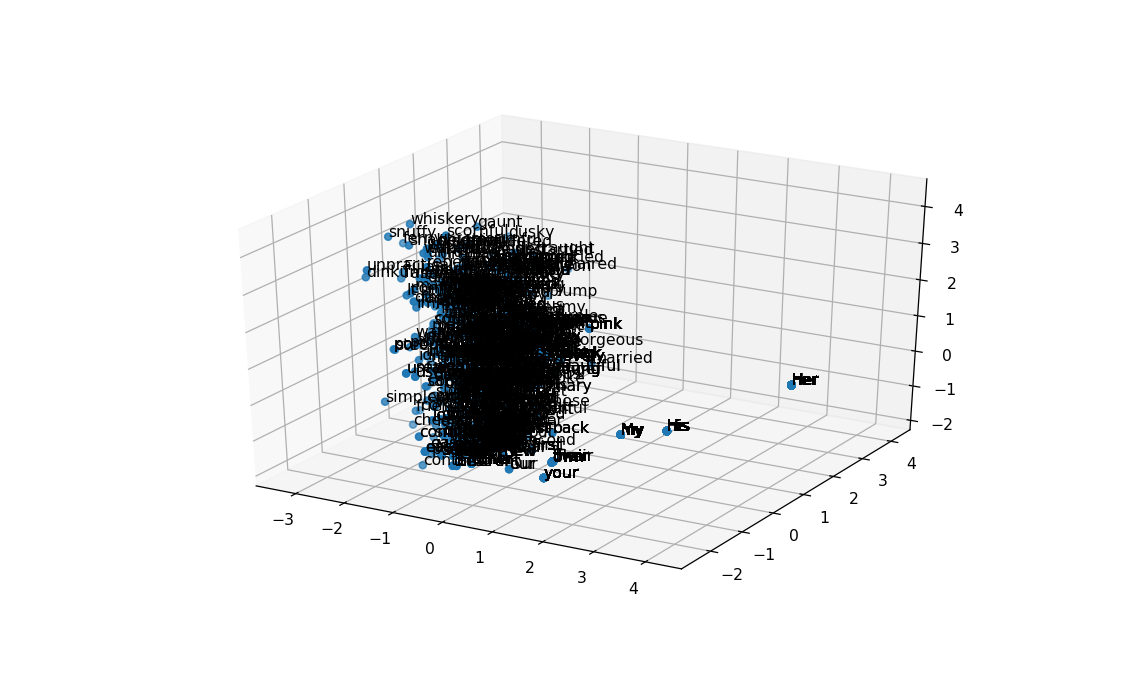

In [188]:
plotResults(df, GarLabels)

This is a 3D visualization of all the adjectives in what I like to call the "Mansfield semantic universe". It's also an interactive map, in which you can click and scroll around to see how all the words in Mansfield's stories relate to one another. I don't think this function is available within these presentations, so I've included a screenshot of the aspects of this word embedding I thought were most interesting.

In [189]:
Image(url= "http://i556.photobucket.com/albums/ss6/amoenus_photo/Public/2018-08-11%201_zpsejy8pxxo.png")

You can see from the image above, that there aren't too many words that pertain to flavors. I focused on the words "thick", "creamy", and "velvety" to see which words occur closely to them in this vector space. The words are seen on the far right of the graph, closer to where descriptions of words are. This would make sense since colors are often lumped in with flavors. However, the most common occurring description words are located on the left of the map. Words such as "toothless", "queer", and "Fijian" are clumped close together. I'd argue that given Mansfield's class in New Zealand society, Pacific Islanders are viewed as exotic and strange, even on their own land.

## In Search of Sensation Words: Tastes and Flavors

In my search to find sensation words, particularly those regarding flavor or taste in Mansfield's writing, I couldn't find enough to substantiate my hypothesis. There were other interesting word clumpings that I would analyze (like "Fijian" or "queer"), perhaps using a race and/or class analysis.

## Word Embedding Analysis of Joyce's _Araby_ and _Two Gallants_

In [190]:
nlp = spacy.load('en_core_web_lg')

In [191]:
[(pair[0], pair[1][:50]) for pair in enumerate(DubParts)]

[(0, '  '),
 (1, ' THE SISTERS  THERE was no hope for him this time:'),
 (2, ' AN ENCOUNTER  IT WAS Joe Dillon who introduced th'),
 (3, ' ARABY   NORTH RICHMOND STREET, being blind, was a'),
 (4, ' EVELINE  SHE sat at the window watching the eveni'),
 (5, ' AFTER THE RACE  THE cars came scudding in towards'),
 (6, ' TWO GALLANTS  THE grey warm evening of August had'),
 (7, " THE BOARDING HOUSE  MRS. MOONEY was a butcher's d"),
 (8, ' A LITTLE CLOUD  EIGHT years before he had seen hi'),
 (9, ' COUNTERPARTS  THE bell rang furiously and, when M'),
 (10, ' CLAY  THE matron had given her leave to go out as'),
 (11, ' A PAINFUL CASE  MR. JAMES DUFFY lived in Chapeliz'),
 (12, ' IVY DAY IN THE COMMITTEE ROOM  OLD JACK raked the'),
 (13, ' A MOTHER  MR HOLOHAN, assistant secretary of the '),
 (14, ' GRACE  TWO GENTLEMEN who were in the lavatory at '),
 (15, " THE DEAD  LILY, the caretaker's daughter, was lit")]

In [192]:
ArPart = DubParts[3]

In [193]:
TG = DubParts[6]

In [194]:
ArTG = ArPart + TG

In [195]:
ATGDoc = nlp(ArTG)

In [196]:
ATGDoc.vector #vectors of 'Araby' and 'Two Gallants'

array([ 4.99829575e-02,  1.39655665e-01, -1.42510220e-01, -4.84997071e-02,
        1.11615025e-01, -7.95222539e-03, -1.85138937e-02, -9.75409076e-02,
       -5.93471527e-02,  2.21304178e+00, -1.21139698e-01,  9.49408561e-02,
        7.05954880e-02, -1.26370236e-01, -1.32412344e-01, -2.36094426e-02,
       -4.68902104e-02,  8.67456973e-01, -1.57551885e-01, -5.24839610e-02,
        9.29505937e-03, -3.14485170e-02, -6.72090128e-02, -3.21739563e-03,
        2.83182114e-02, -2.01286916e-02, -4.26060595e-02, -3.89415063e-02,
       -1.69033231e-03, -8.78714323e-02, -5.84343262e-02,  8.25336874e-02,
       -1.13221154e-01,  6.05583899e-02,  6.18034899e-02, -1.20097466e-01,
       -3.98240015e-02,  4.28264141e-02, -6.03266656e-02, -5.61748892e-02,
        2.59726066e-02,  3.84388715e-02,  2.04353109e-02, -1.28617808e-01,
        1.02349080e-01,  3.39922570e-02, -1.56731188e-01, -6.66680038e-02,
        1.13119343e-02, -4.48215427e-03, -2.98310239e-02,  2.13350244e-02,
       -7.61478394e-02,  

In [197]:
ATGAdjs = [w for w in ATGDoc if w.pos_ == "ADJ"]

In [198]:
ATGVecs = [w.vector for w in ATGAdjs]
ATGLabels = [w.string.strip() for w in ATGAdjs]

In [199]:
pca = PCA(n_components=3)

In [200]:
pcaOut = pca.fit_transform(ATGVecs)

In [201]:
pcaOut.shape
pcaOut.shape

(679, 3)

In [202]:
def plotResults(df, labels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

In [203]:
df = pd.DataFrame(pcaOut)

<IPython.core.display.Javascript object>


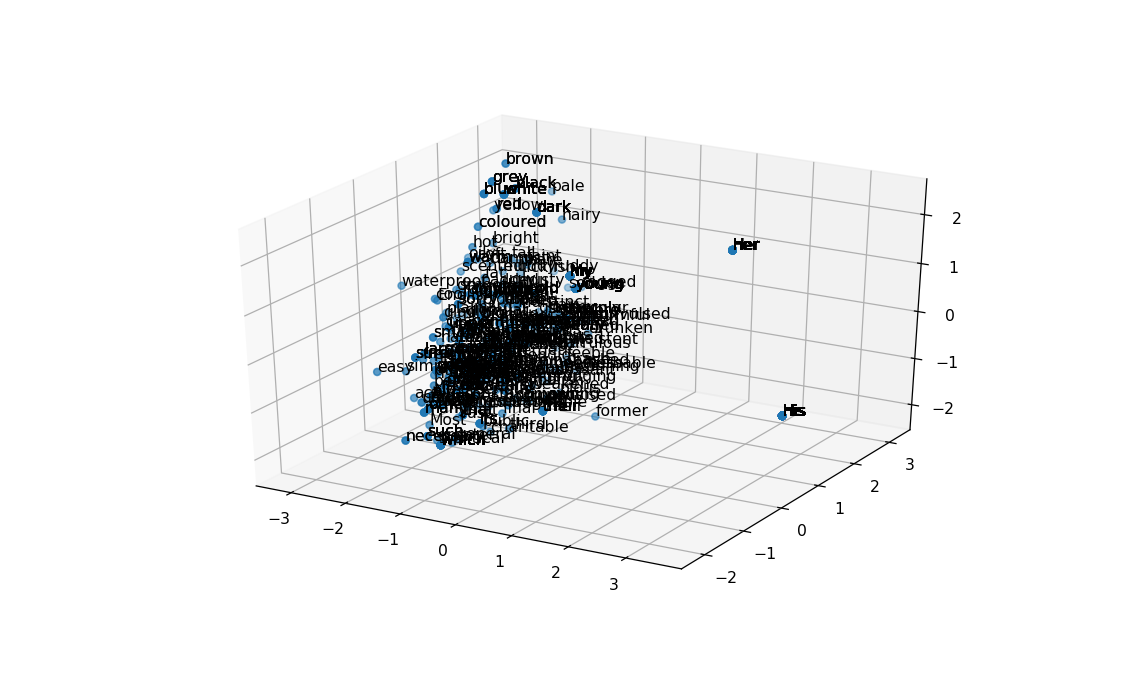

In [204]:
plotResults(df, ATGLabels)

In [205]:
Image(url= "http://i556.photobucket.com/albums/ss6/amoenus_photo/Public/2018-08-11%202_zpsdlxozul8.png")

## In Search of Sensation Words: Sound

Like in Mansfield's stories, the adjectives related to sound aren't as common as I thought in Joyce's stories. There are, however, very interesting words that are within close proximity. Why would "Cool" and "English" be so close together above the rest of the word clusters? Could this "cool" sensation be related to the unwelcoming sentiment of the English in Ireland during Joyce's time? Religion is also a very contested subject in the novel. Why would "pious" and "cunning" be so close together? You can certainly see an outline of common themes found in Joyce's stories.

## Word Embedding Comparison of Both Joyce and Mansfield

In [206]:
JmDoc = nlp(ArTG + TYGar)

In [207]:
JmDoc.vector #Vector of all stories

array([ 1.77551545e-02,  1.59538984e-01, -1.49287924e-01, -5.62786162e-02,
        1.13693438e-01, -5.04328823e-03, -1.09593440e-02, -1.04295157e-01,
       -7.79616386e-02,  2.12422657e+00, -1.24087781e-01,  8.15362036e-02,
        7.19059855e-02, -1.10820882e-01, -1.44962490e-01, -3.67754921e-02,
       -4.58700024e-02,  8.82879913e-01, -1.58134222e-01, -5.17906211e-02,
        1.16464421e-02, -1.88339967e-02, -5.53911626e-02, -7.49246264e-03,
        4.95445309e-03, -1.95316281e-02, -4.20275256e-02, -3.58993784e-02,
        4.26108986e-02, -1.17078267e-01, -6.35709092e-02,  8.06223825e-02,
       -9.58445817e-02,  5.68182804e-02,  8.84922743e-02, -1.09065153e-01,
       -2.40898356e-02,  4.84685972e-02, -7.27786124e-02, -5.62976822e-02,
        2.22020596e-02,  4.07446995e-02,  1.70145240e-02, -1.29841700e-01,
        1.11726694e-01,  2.98613086e-02, -1.78795382e-01, -6.70013875e-02,
        3.30334008e-02, -1.11623751e-02, -3.65472659e-02,  5.61080463e-02,
       -8.26435611e-02,  

In [208]:
JmAdjs = [w for w in JmDoc if w.pos_ == "ADJ"]

In [209]:
JmVecs = [w.vector for w in JmAdjs]
JmLabels = [w.string.strip() for w in JmAdjs]

In [210]:
pca = PCA(n_components=3)

In [211]:
pcaOut = pca.fit_transform(JmVecs)

In [212]:
pcaOut.shape
pcaOut.shape

(2372, 3)

In [213]:
def plotResults(df, labels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

In [214]:
df = pd.DataFrame(pcaOut)

<IPython.core.display.Javascript object>


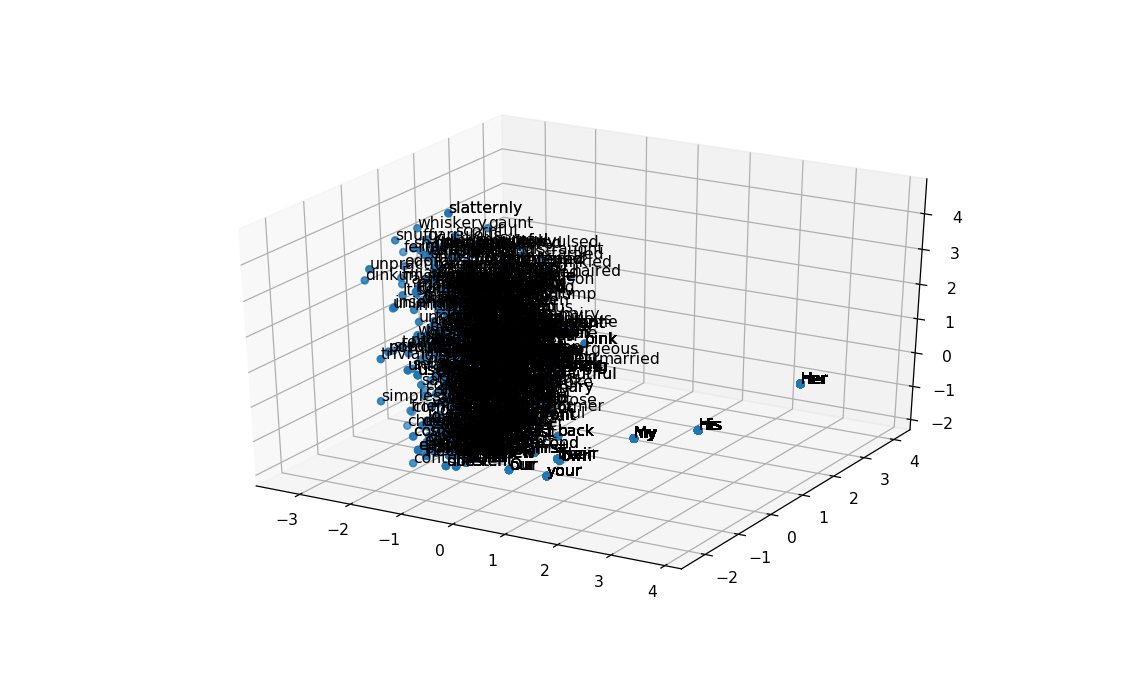

In [215]:
plotResults(df, JmLabels)

In [216]:
Image(url= "http://i556.photobucket.com/albums/ss6/amoenus_photo/Public/2018-08-11%203_zpspbk8q5dk.png")

By looking at the adjectives from both stories, you can see there is a lot of overlap in the left side of the map. Visual references such as "shadowy" and "ragged" are often used. Colors have their own corner in the bottom left, which leads me to believe that visual descriptions are more likely used by both authors than sound or taste. 

# Discussion

Originally, I wanted to use a control text for comparison with Joyce and Mansfield's stories. I was going to use Helen Keller's autobiography, _How I See The World_ which was rich in sensory language, despite her being a blind-deaf woman. Her writings about the senses were vivid descriptions and would've been perfect for this project. Due to time constraints, I was not able to do this, but will likely continue this project in the future.

# Conclusion

I knew that the descriptions in these stories wouldn'y have been strictly limited to sensations such as "taste" or "sound", but I didn't expect that those descriptors would have been used so little. This perception of mine might have been biased because they were the most memorable scenes. They powerfully invoke perspectives only the author could create. Visual representations are the most likely used words in all the stories, which is no surprise given that these descriptions are necesssary for the reader to interpret the bigger picture of a story.


# Sources Cited

Brownlee, Jason. "What Are Word Embeddings For Text?". _Machine Learning Mastery_. 2017.<br> https://machinelearningmastery.com/what-are-word-embeddings/<br>
<br>
Joyce, James. "Araby" and "Two Gallants". _Dubliners_. 1914.<br>
<br>
Mansfield, Katherine. "The Garden Party" and "The Young Girl". _The Garden Party and Other Stories_. 1922.<br>

In [217]:
filename = 'BetsyRohney--Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('BetsyRohney--Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1000
